# Heart Disease Data Set

Data Set Information:

This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).



Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)



In [1]:
#import basic library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_hd=pd.read_csv("heart_desease.csv",header=None)
df_hd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [3]:
#add columns name
df_hd.columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]

In [4]:
df=df_hd
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [5]:
#checking dtypes 
df_hd.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [6]:
#checking null values
df_hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [7]:
# replace all '?' into 0.
df_hd=np.where((df_hd=="?"),"0",df_hd)

In [8]:
#coverte to dataframe 
df_hd=pd.DataFrame(df_hd,columns=df.columns)
df_hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,0,0,2
1,44,1,4,130,209,0,1,127,0,0,0,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,0,0,0,1
196,62,1,1,0,139,0,1,0,0,0,0,0,0,0
197,55,1,4,122,223,1,1,100,0,0,0,0,6,2
198,58,1,4,0,385,1,2,0,0,0,0,0,0,0


In [9]:
df_hd.dtypes

age         object
sex         object
cp          object
trestbps    object
chol        object
fbs         object
restecg     object
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num         object
dtype: object

In [10]:
data=df_hd.astype(float)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num         float64
dtype: object

In [11]:
df["thal"].value_counts()


?    166
7     22
6      8
3      4
Name: thal, dtype: int64

In [12]:

data["trestbps"]=np.where((data["trestbps"]==0),data["trestbps"].mean(),data["trestbps"])
data["chol"]=np.where((data["chol"]==0),data["chol"].mean(),data["chol"])
data["thalach"]=np.where((data["thalach"]==0),data["thalach"].mean(),data["thalach"])

In [13]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,4.0,140.00,260.0,0.0,1.0,112.000,1.0,3.0,2.0,0.0,0.0,2.0
1,44.0,1.0,4.0,130.00,209.0,0.0,1.0,127.000,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,1.0,4.0,132.00,218.0,0.0,1.0,140.000,1.0,1.5,3.0,0.0,0.0,2.0
3,55.0,1.0,4.0,142.00,228.0,0.0,1.0,149.000,1.0,2.5,1.0,0.0,0.0,1.0
4,66.0,1.0,3.0,110.00,213.0,1.0,2.0,99.000,1.0,1.3,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127.00,333.0,1.0,1.0,154.000,0.0,0.0,0.0,0.0,0.0,1.0
196,62.0,1.0,1.0,96.31,139.0,0.0,1.0,90.255,0.0,0.0,0.0,0.0,0.0,0.0
197,55.0,1.0,4.0,122.00,223.0,1.0,1.0,100.000,0.0,0.0,0.0,0.0,6.0,2.0
198,58.0,1.0,4.0,96.31,385.0,1.0,2.0,90.255,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000
mean,59.350000,0.970000,3.505000,123.758350,220.787200,0.340000,0.735000,114.172575,0.475000,0.951000,1.045000,0.0,1.070000,1.520000
std,7.811697,0.171015,0.795701,23.336976,53.982934,0.474898,0.683455,23.707999,0.500628,1.110344,1.166093,0.0,2.427874,1.219441
min,35.000000,0.000000,1.000000,96.000000,100.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,0.000000,0.0,0.000000,0.000000
25%,55.000000,1.000000,3.000000,96.310000,172.490000,0.000000,0.000000,90.255000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,60.000000,1.000000,4.000000,123.000000,214.000000,0.000000,1.000000,111.500000,0.000000,0.500000,0.000000,0.0,0.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,0.0,0.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


obsrvations00

> ca column has no values


age            AxesSubplot(0.125,0.536818;0.0945122x0.343182)
sex         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
cp          AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
trestbps    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chol        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
fbs         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
restecg     AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
thalach           AxesSubplot(0.125,0.125;0.0945122x0.343182)
exang          AxesSubplot(0.238415,0.125;0.0945122x0.343182)
oldpeak        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
slope          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
ca             AxesSubplot(0.578659,0.125;0.0945122x0.343182)
thal           AxesSubplot(0.692073,0.125;0.0945122x0.343182)
num            AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

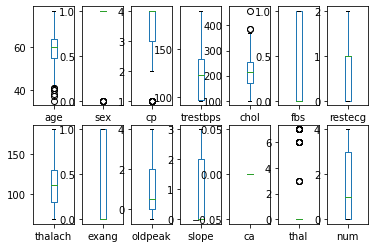

In [15]:
data.plot(kind="box",subplots=True,layout=(2,7))

In [16]:
data["sex"].value_counts()

1.0    194
0.0      6
Name: sex, dtype: int64

In [17]:
data["ca"].value_counts()

0.0    200
Name: ca, dtype: int64

In [18]:
#drop the column ca bcouse it has no value
data.drop("ca",axis=1,inplace=True)

In [19]:
#checking outliers
z=np.abs(zscore(data))
np.where(z>3)

(array([ 51,  66,  72,  76,  79,  80,  82,  96,  97, 126, 128, 131, 133,
        137, 190, 195, 196, 198], dtype=int64),
 array([1, 2, 2, 2, 1, 4, 4, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 4], dtype=int64))

In [20]:
data.sex.value_counts()

1.0    194
0.0      6
Name: sex, dtype: int64

if we remove the ouliers we remove also some important information so we dont remove the outliers.

In [21]:
data.num.value_counts()

1.0    56
0.0    51
3.0    42
2.0    41
4.0    10
Name: num, dtype: int64

In [22]:
#checking skewneww
data.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps    0.415350
chol        1.080410
fbs         0.680636
restecg     0.391463
thalach     0.529894
exang       0.100883
oldpeak     0.823429
slope       0.468819
thal        1.905183
num         0.297393
dtype: float64

In [23]:
#reduce skewness
from scipy.stats import boxcox
data["cp"]=boxcox(data.cp)[0]
data["sex"]=np.log1p(data["sex"])


show relations with visualization

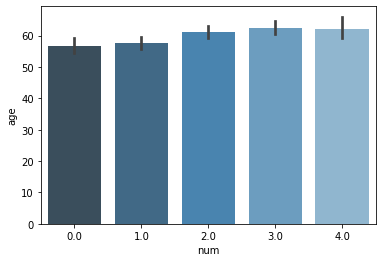

In [24]:
sns.barplot(x=data["num"],y=data["age"],palette="Blues_d")

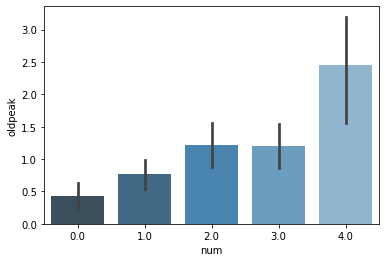

In [25]:
sns.barplot(x=data["num"],y=data["oldpeak"],palette="Blues_d")


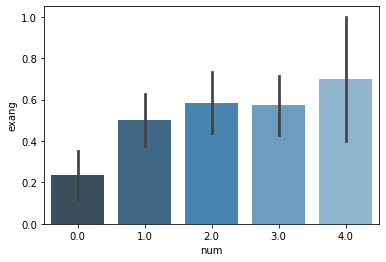

In [26]:
sns.barplot(x=data["num"],y=data["exang"],palette="Blues_d")

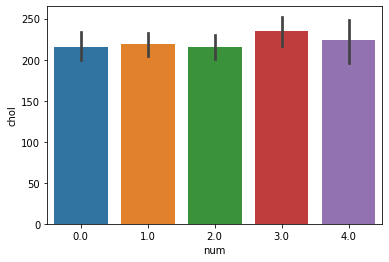

In [27]:
sns.barplot(x=data["num"],y=data["chol"])

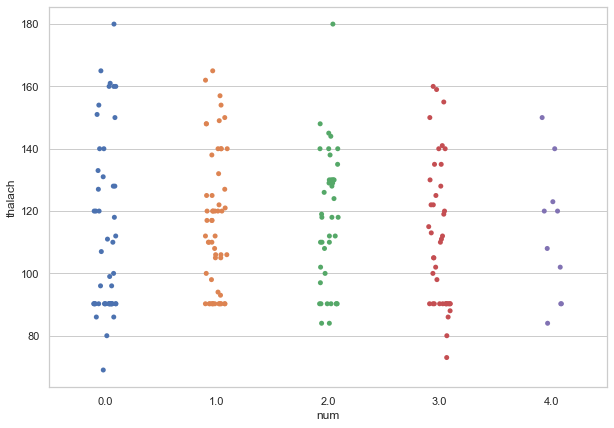

In [28]:
plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
sns.stripplot(x=data["num"],y=data["thalach"])

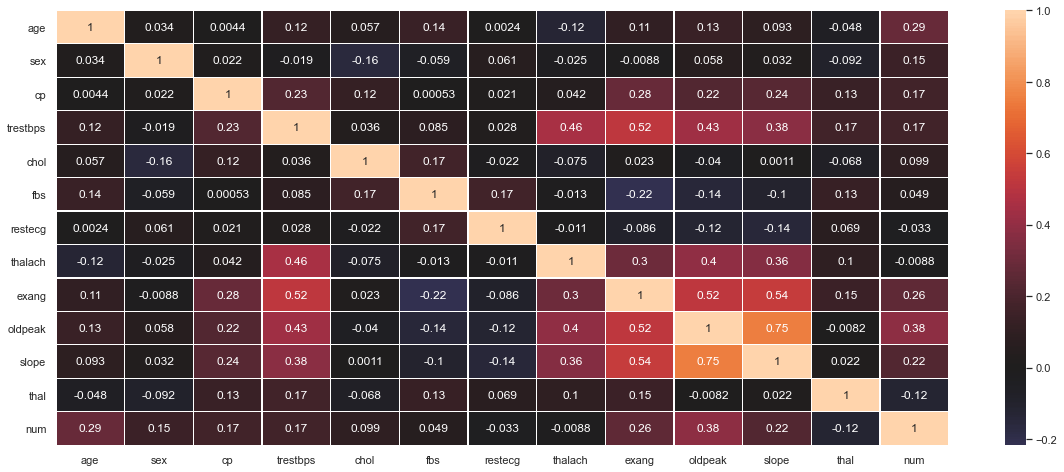

In [29]:
#visualize correlations with heatmap
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True,center=0,linewidths=.2)
plt.show()

columns age,exang,oldpeak highly correlated with output

# creating classification model 

In [30]:
X=data.iloc[:,0:-1]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,63.0,0.693147,61.610391,140.00,260.0,0.0,1.0,112.000,1.0,3.0,2.0,0.0
1,44.0,0.693147,61.610391,130.00,209.0,0.0,1.0,127.000,0.0,0.0,0.0,0.0
2,60.0,0.693147,61.610391,132.00,218.0,0.0,1.0,140.000,1.0,1.5,3.0,0.0
3,55.0,0.693147,61.610391,142.00,228.0,0.0,1.0,149.000,1.0,2.5,1.0,0.0
4,66.0,0.693147,19.490946,110.00,213.0,1.0,2.0,99.000,1.0,1.3,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.000000,61.610391,127.00,333.0,1.0,1.0,154.000,0.0,0.0,0.0,0.0
196,62.0,0.693147,0.000000,96.31,139.0,0.0,1.0,90.255,0.0,0.0,0.0,0.0
197,55.0,0.693147,61.610391,122.00,223.0,1.0,1.0,100.000,0.0,0.0,0.0,6.0
198,58.0,0.693147,61.610391,96.31,385.0,1.0,2.0,90.255,0.0,0.0,0.0,0.0


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
#using standardization
sc=StandardScaler()
x=sc.fit_transform(X)

In [33]:
x=pd.DataFrame(x,columns=X.columns)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,0.468421,0.175863,0.710398,0.697709,0.728215,-0.717741,0.388709,-0.091869,1.051315,1.850005,0.821029,-0.441821
1,-1.969933,0.175863,0.710398,0.268129,-0.218898,-0.717741,0.388709,0.542417,-0.951190,-0.858641,-0.898403,-0.441821
2,0.083417,0.175863,0.710398,0.354045,-0.051761,-0.717741,0.388709,1.092131,1.051315,0.495682,1.680745,-0.441821
3,-0.558255,0.175863,0.710398,0.783624,0.133948,-0.717741,0.388709,1.472702,1.051315,1.398564,-0.038687,-0.441821
4,0.853424,0.175863,-1.112252,-0.591031,-0.144615,1.393261,1.855535,-0.641583,1.051315,0.315106,0.821029,-0.441821
...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.686589,-5.686241,0.710398,0.139255,2.083888,1.393261,0.388709,1.684131,-0.951190,-0.858641,-0.898403,-0.441821
196,0.340086,0.175863,-1.955690,-1.179126,-1.518859,-0.717741,0.388709,-1.011372,-0.951190,-0.858641,-0.898403,-0.441821
197,-0.558255,0.175863,0.710398,-0.075535,0.041094,1.393261,0.388709,-0.599297,-0.951190,-0.858641,-0.898403,2.035679
198,-0.173251,0.175863,0.710398,-1.179126,3.049573,1.393261,1.855535,-1.011372,-0.951190,-0.858641,-0.898403,-0.441821


In [34]:
y=data["num"]
y

0      2.0
1      0.0
2      2.0
3      1.0
4      0.0
      ... 
195    1.0
196    0.0
197    2.0
198    0.0
199    1.0
Name: num, Length: 200, dtype: float64

In [35]:
#import model methods
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [60]:
models=[SVC(),SVC(kernel="poly"),SVC(kernel="linear"),DecisionTreeClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]

In [61]:
for i in models:
    print("*****************",i,"*******************")
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("AC:",accuracy_score(y_test,pred))
    print("score:",i.score(x_train,y_train))
    print(confusion_matrix(y_test,pred))
    print("CR:",classification_report(y_test,pred))
    print("\n")

***************** SVC() *******************
AC: 0.3409090909090909
score: 0.6474358974358975
[[3 3 2 0 0]
 [5 8 1 0 0]
 [3 4 1 3 0]
 [3 2 0 3 0]
 [1 0 1 1 0]]
CR:               precision    recall  f1-score   support

         0.0       0.20      0.38      0.26         8
         1.0       0.47      0.57      0.52        14
         2.0       0.20      0.09      0.13        11
         3.0       0.43      0.38      0.40         8
         4.0       0.00      0.00      0.00         3

    accuracy                           0.34        44
   macro avg       0.26      0.28      0.26        44
weighted avg       0.31      0.34      0.32        44



***************** SVC(kernel='poly') *******************
AC: 0.22727272727272727
score: 0.6730769230769231
[[1 7 0 0 0]
 [4 8 1 1 0]
 [2 7 0 2 0]
 [1 6 0 1 0]
 [0 1 1 1 0]]
CR:               precision    recall  f1-score   support

         0.0       0.12      0.12      0.12         8
         1.0       0.28      0.57      0.37        14
      

In [39]:
#selecting best model and checking best random stats
max_r=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    dtc= DecisionTreeClassifier() 
    dtc.fit(x_train,y_train)
    predd=dtc.predict(x_test)
    AC=accuracy_score(y_test,predd)
    if AC>max_r:
        max_r=AC
        final_AC=r
print("max r2 score corresponding to",final_AC,"is",max_r) 
print("RMSE:",classification_report(y_test,predd))

max r2 score corresponding to 168 is 0.4782608695652174
RMSE:               precision    recall  f1-score   support

         0.0       0.30      0.21      0.25        14
         1.0       0.21      0.38      0.27         8
         2.0       0.29      0.18      0.22        11
         3.0       0.15      0.20      0.17        10
         4.0       0.00      0.00      0.00         3

    accuracy                           0.22        46
   macro avg       0.19      0.19      0.18        46
weighted avg       0.23      0.22      0.21        46



In [40]:
max_r=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    s= SVC() 
    s.fit(x_train,y_train)
    preds=s.predict(x_test)
    AC=accuracy_score(y_test,preds)
    if AC>max_r:
        max_r=AC
        final_AC=r
print("max r2 score corresponding to",final_AC,"is",max_r) 
print("RMSE:",classification_report(y_test,preds))

max r2 score corresponding to 61 is 0.5217391304347826
RMSE:               precision    recall  f1-score   support

         0.0       0.45      0.36      0.40        14
         1.0       0.19      0.50      0.28         8
         2.0       0.50      0.27      0.35        11
         3.0       0.50      0.40      0.44        10
         4.0       0.00      0.00      0.00         3

    accuracy                           0.35        46
   macro avg       0.33      0.31      0.29        46
weighted avg       0.40      0.35      0.35        46



In [41]:
max_r=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    kn= KNeighborsClassifier()
    kn.fit(x_train,y_train)
    predk=kn.predict(x_test)
    AC=accuracy_score(y_test,predk)
    if AC>max_r:
        max_r=AC
        final_AC=r
print("max r2 score corresponding to",final_AC,"is",max_r) 
print("RMSE:",classification_report(y_test,predk))

max r2 score corresponding to 76 is 0.5217391304347826
RMSE:               precision    recall  f1-score   support

         0.0       0.45      0.71      0.56        14
         1.0       0.17      0.25      0.20         8
         2.0       0.50      0.18      0.27        11
         3.0       0.25      0.20      0.22        10
         4.0       0.00      0.00      0.00         3

    accuracy                           0.35        46
   macro avg       0.27      0.27      0.25        46
weighted avg       0.34      0.35      0.32        46



# USEING ENSEMBLE TECHNIQUES

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [43]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predad=rfc.predict(x_test)
print("AS:",accuracy_score(y_test,predad))
print("CM:",confusion_matrix(y_test,predad)) 
print("CR:",classification_report(y_test,predad))

AS: 0.3695652173913043
CM: [[6 5 2 1 0]
 [2 4 1 1 0]
 [1 5 4 1 0]
 [1 5 1 3 0]
 [0 0 2 1 0]]
CR:               precision    recall  f1-score   support

         0.0       0.60      0.43      0.50        14
         1.0       0.21      0.50      0.30         8
         2.0       0.40      0.36      0.38        11
         3.0       0.43      0.30      0.35        10
         4.0       0.00      0.00      0.00         3

    accuracy                           0.37        46
   macro avg       0.33      0.32      0.31        46
weighted avg       0.41      0.37      0.37        46



In [54]:
adb=AdaBoostClassifier(base_estimator=s,n_estimators=100,algorithm="SAMME")
adb.fit(x_train,y_train)
predad=adb.predict(x_test)
print("AS:",accuracy_score(y_test,predad))
print("CM:",confusion_matrix(y_test,predad)) 
print("CR:",classification_report(y_test,predad))

AS: 0.17391304347826086
CM: [[ 0 14  0  0  0]
 [ 0  8  0  0  0]
 [ 0 11  0  0  0]
 [ 0 10  0  0  0]
 [ 0  3  0  0  0]]
CR:               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.17      1.00      0.30         8
         2.0       0.00      0.00      0.00        11
         3.0       0.00      0.00      0.00        10
         4.0       0.00      0.00      0.00         3

    accuracy                           0.17        46
   macro avg       0.03      0.20      0.06        46
weighted avg       0.03      0.17      0.05        46



In [45]:
adc=GradientBoostingClassifier()
adc.fit(x_train,y_train)
predad=adc.predict(x_test)
print("AS:",accuracy_score(y_test,predad))
print("CM:",confusion_matrix(y_test,predad)) 
print("CR:",classification_report(y_test,predad))

AS: 0.21739130434782608
CM: [[3 8 1 2 0]
 [3 3 2 0 0]
 [6 2 2 1 0]
 [2 4 2 2 0]
 [1 0 2 0 0]]
CR:               precision    recall  f1-score   support

         0.0       0.20      0.21      0.21        14
         1.0       0.18      0.38      0.24         8
         2.0       0.22      0.18      0.20        11
         3.0       0.40      0.20      0.27        10
         4.0       0.00      0.00      0.00         3

    accuracy                           0.22        46
   macro avg       0.20      0.19      0.18        46
weighted avg       0.23      0.22      0.21        46



USEING GRIDSEARCHCV

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
parameters={'n_neighbors':[5,10,15,20,25,30,35,40],'weights':['uniform','distance'], 'leaf_size':[20,30,40,50], 'p':[2,3,4,5,6,7]}


In [48]:
clf=GridSearchCV(kn,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20, 30, 40, 50],
                         'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40],
                         'p': [2, 3, 4, 5, 6, 7],
                         'weights': ['uniform', 'distance']})

In [49]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_leaf_size',
 'param_n_neighbors',
 'param_p',
 'param_weights',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [50]:
print(clf.best_params_)

{'leaf_size': 20, 'n_neighbors': 40, 'p': 2, 'weights': 'distance'}


In [55]:
max_r=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    kng= KNeighborsClassifier(leaf_size=20,n_neighbors=40,p=2,weights="distance")
    kng.fit(x_train,y_train)
    predk=kng.predict(x_test)
    AC=accuracy_score(y_test,predk)
    if AC>max_r:
        max_r=AC
        final_AC=r
print("max r2 score corresponding to",final_AC,"is",max_r) 
print("RMSE:",classification_report(y_test,predk))

max r2 score corresponding to 109 is 0.5217391304347826
RMSE:               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50        14
         1.0       0.19      0.38      0.25         8
         2.0       0.31      0.45      0.37        11
         3.0       0.00      0.00      0.00        10
         4.0       0.00      0.00      0.00         3

    accuracy                           0.33        46
   macro avg       0.20      0.27      0.22        46
weighted avg       0.26      0.33      0.28        46



In [57]:
#checking cross valication score for underfitting and overfitting
cvs=cross_val_score(kng,x,y,cv=6)
print(cvs.mean())
print(cvs)

0.38978015448603687
[0.32352941 0.5        0.3030303  0.42424242 0.36363636 0.42424242]


In [58]:
# saveing best model
import joblib

joblib.dump(kng,"heart_desease.pkl")

['heart_desease.pkl']